In [1]:
import matplotlib.pyplot as plt , seaborn as sns,pandas as pd ,numpy as np
df = pd.read_csv(r"..\Datasets\Automobile_data.csv")
%matplotlib inline

### let's know if the data is clean:

In [2]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### no null values but '?' found

In [3]:
df.replace('?',np.nan,inplace = True)

In [4]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### <font color = "green">Let's Apply the ' _Divide and conquer_ ' Concept here:<font>
---
> __We take each column alone Explore it , Confirm it's clean, outlires existance__
---
> __Visualize The column data with suitable tool__
---
> __look if there is relation ship between it and prev Column with visulizations__
---
> __extract some insights from this relationships__



In [5]:
def printing_info(column):
    print('\t\t',column.capitalize(),'Column :\n\n')
    
    print("Unique Values")
    print(df[column].unique())
    print('='*50)
    print('Value Count')
    print(df[column].value_counts())
    print('='*50)
    print("Info")
    print(df[column].info())
    print('='*50)
    print("Column Describe")
    print(df[column].describe())
    print('='*100)

In [6]:
printing_info('symboling')

		 Symboling Column :


Unique Values
[ 3  1  2  0 -1 -2]
Value Count
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
Info
<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: symboling
Non-Null Count  Dtype
--------------  -----
205 non-null    int64
dtypes: int64(1)
memory usage: 1.7 KB
None
Column Describe
count    205.000000
mean       0.834146
std        1.245307
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symboling, dtype: float64


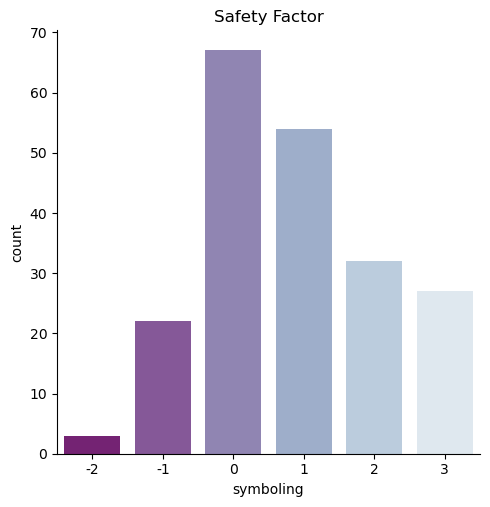

In [7]:

sns.catplot(x ='symboling',data = df,kind = 'count',palette = 'BuPu_r')
plt.title("Safety Factor")
plt.show()

> __<font color = 'red'>from Symboling Column we conclude that few number of cars has high safety and the most has moderate safety factor.<font>__

In [8]:
df['normalized-losses'] = df['normalized-losses'].astype(float)

printing_info('normalized-losses')

		 Normalized-losses Column :


Unique Values
[ nan 164. 158. 192. 188. 121.  98.  81. 118. 148. 110. 145. 137. 101.
  78. 106.  85. 107. 104. 113. 150. 129. 115.  93. 142. 161. 153. 125.
 128. 122. 103. 168. 108. 194. 231. 119. 154.  74. 186.  83. 102.  89.
  87.  77.  91. 134.  65. 197.  90.  94. 256.  95.]
Value Count
161.0    11
91.0      8
150.0     7
128.0     6
134.0     6
104.0     6
95.0      5
102.0     5
103.0     5
74.0      5
85.0      5
168.0     5
94.0      5
65.0      5
106.0     4
122.0     4
148.0     4
118.0     4
93.0      4
101.0     3
125.0     3
137.0     3
154.0     3
83.0      3
115.0     3
119.0     2
87.0      2
194.0     2
197.0     2
108.0     2
89.0      2
164.0     2
158.0     2
145.0     2
192.0     2
188.0     2
81.0      2
110.0     2
113.0     2
129.0     2
153.0     2
107.0     1
78.0      1
186.0     1
231.0     1
77.0      1
98.0      1
121.0     1
90.0      1
142.0     1
256.0     1
Name: normalized-losses, dtype: int64
Info
<class 'pandas.core.se

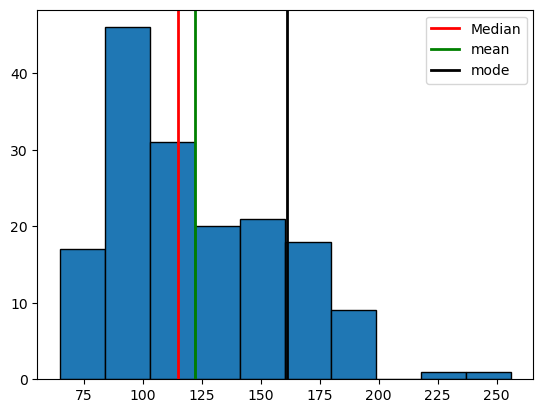

In [9]:
plt.hist(x = df['normalized-losses'], edgecolor='black')
plt.axvline(df['normalized-losses'].median(), color='red', label="Median", linewidth=2)
plt.axvline(df['normalized-losses'].mean(), color='green', label="mean", linewidth=2)
plt.axvline(df['normalized-losses'].mode()[0], color='black', label="mode", linewidth=2)

plt.legend()
plt.show()

In [10]:
df['normalized-losses'].replace(np.nan,df['normalized-losses'].median(),inplace = True)

In [11]:
printing_info('make')

		 Make Column :


Unique Values
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
Value Count
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64
Info
<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: make
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
None
Column Describe
count        205
unique        22
top       toyo

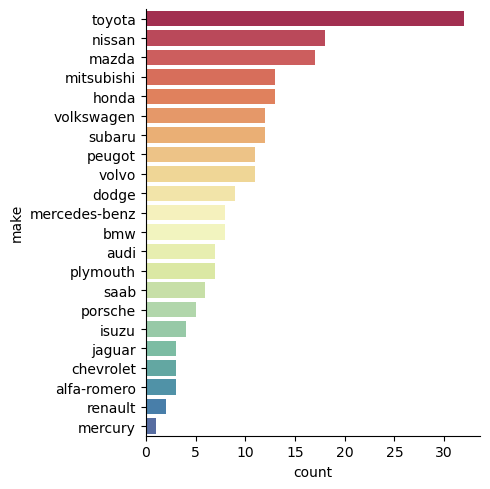

In [12]:
theorder = df['make'].value_counts().index
sns.catplot(y = 'make',data = df,kind = 'count',order =theorder,palette = 'Spectral')

> __<font color = 'red'>from Make Column we conclude that The 3 Top Makers are toyote, nissan and mazda.<font>__

In [13]:
printing_info('fuel-type')

		 Fuel-type Column :


Unique Values
['gas' 'diesel']
Value Count
gas       185
diesel     20
Name: fuel-type, dtype: int64
Info
<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: fuel-type
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
None
Column Describe
count     205
unique      2
top       gas
freq      185
Name: fuel-type, dtype: object


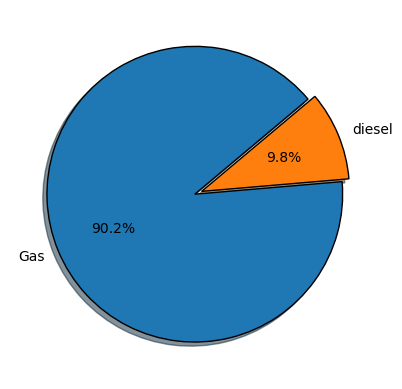

In [14]:
fuel = [df['fuel-type'].value_counts()[0],df['fuel-type'].value_counts()[1]]
plt.pie(fuel,labels=['Gas','diesel'],wedgeprops={'edgecolor':'black'},
        explode= [0,0.05],
        shadow=True,
        startangle=40,
        autopct = '%1.1f%%')
plt.show()

> __<font color = 'red'>from Fuel-type Column we conclude that most of fuel used in data is Gas<font>__

### which cars used gas and which used diesel as fuel type?

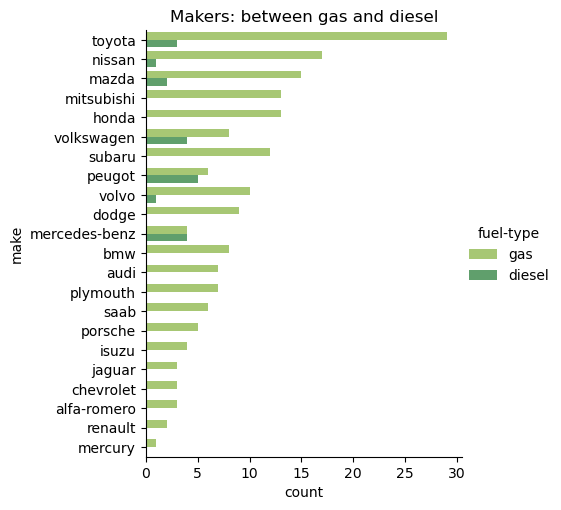

In [15]:
sns.catplot(y = 'make',data = df,kind = 'count',hue = 'fuel-type',order = theorder,palette = 'summer_r')
plt.title("Makers: between gas and diesel");


> __<font color = 'red'>It's Clear that Only "Peugot" The Higher user of Diesel here!<font>__

In [16]:
printing_info('aspiration')

		 Aspiration Column :


Unique Values
['std' 'turbo']
Value Count
std      168
turbo     37
Name: aspiration, dtype: int64
Info
<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: aspiration
Non-Null Count  Dtype 
--------------  ----- 
205 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
None
Column Describe
count     205
unique      2
top       std
freq      168
Name: aspiration, dtype: object


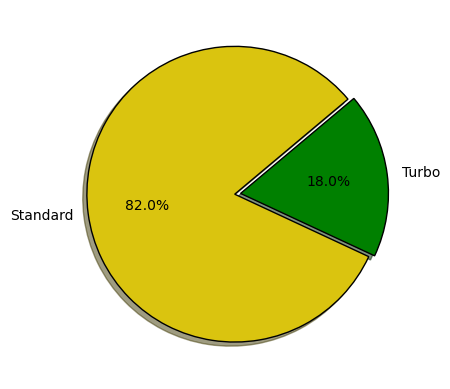

In [17]:
asp = [df['aspiration'].value_counts()[0],df['aspiration'].value_counts()[1]]
plt.pie(asp,labels=['Standard','Turbo'],colors = ['#DAC40F','green'],wedgeprops={'edgecolor':'black'},
        explode= [0,0.04],
        shadow=True,
        startangle=40,
        autopct = '%1.1f%%')
plt.show()

> __<font color = 'red'>This give insight that the most Aspiration installed is the Standard<font>__

### we want to ask : Which Cars makers are using Turbo aspiration?

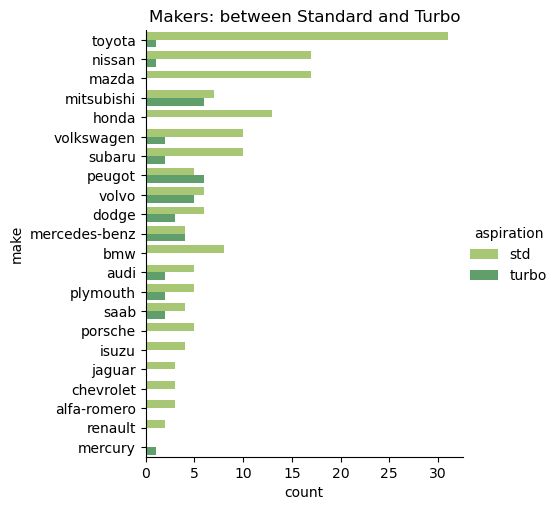

In [18]:
sns.catplot(y = 'make',data = df,kind = 'count',hue = 'aspiration',order = theorder,palette = 'summer_r')
plt.title("Makers: between Standard and Turbo");


> __<font color = 'red'>Two makers has higher utilizations of Turbo aspiration are 'peugot' and 'mitsubishi'<font>__

### Q: Which type between std and turbo has higher normalized losses?

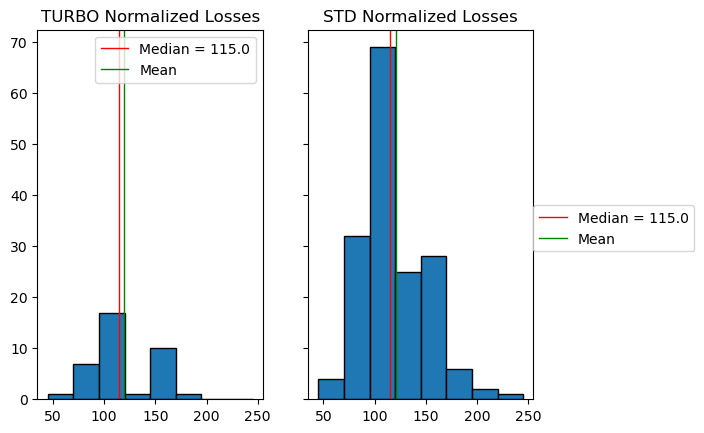

In [19]:
onee = df[df['aspiration']=='turbo']['normalized-losses']
twoo = df[df['aspiration']=='std']['normalized-losses']

binss = [int(x) for x in range(int(df['normalized-losses'].min())-20,int(df['normalized-losses'].max()),25)]
fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols=2,sharex = True,sharey = True)

ax1.hist(x = onee,bins = binss, edgecolor = 'black')
ax2.hist(x = twoo,bins = binss, edgecolor = 'black')
ax1.set_title("TURBO Normalized Losses")
ax2.set_title("STD Normalized Losses")

ax1.axvline(onee.median(), color='red', label=f"Median = {onee.median()}", linewidth=1)
ax1.axvline(onee.mean(), color='green', label="Mean", linewidth=1)

ax2.axvline(twoo.median(), color='red', label=f"Median = {twoo.median()}", linewidth=1)
ax2.axvline(twoo.mean(), color='green', label="Mean", linewidth=1)

ax1.legend()
ax2.legend(loc = [1,0.4])
# print(help(plt.legend()))
plt.show()

> __<font color ='red'>This Told that the normalized losses in two types are almost the same but the standard has few higher values<font>__

In [20]:
printing_info('num-of-doors')

		 Num-of-doors Column :


Unique Values
['two' 'four' nan]
Value Count
four    114
two      89
Name: num-of-doors, dtype: int64
Info
<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: num-of-doors
Non-Null Count  Dtype 
--------------  ----- 
203 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
None
Column Describe
count      203
unique       2
top       four
freq       114
Name: num-of-doors, dtype: object


In [21]:
df['num-of-doors'].isna().sum()

2

In [22]:
df.dropna(inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   normalized-losses  193 non-null    float64
 2   make               193 non-null    object 
 3   fuel-type          193 non-null    object 
 4   aspiration         193 non-null    object 
 5   num-of-doors       193 non-null    object 
 6   body-style         193 non-null    object 
 7   drive-wheels       193 non-null    object 
 8   engine-location    193 non-null    object 
 9   wheel-base         193 non-null    float64
 10  length             193 non-null    float64
 11  width              193 non-null    float64
 12  height             193 non-null    float64
 13  curb-weight        193 non-null    int64  
 14  engine-type        193 non-null    object 
 15  num-of-cylinders   193 non-null    object 
 16  engine-size        193 non

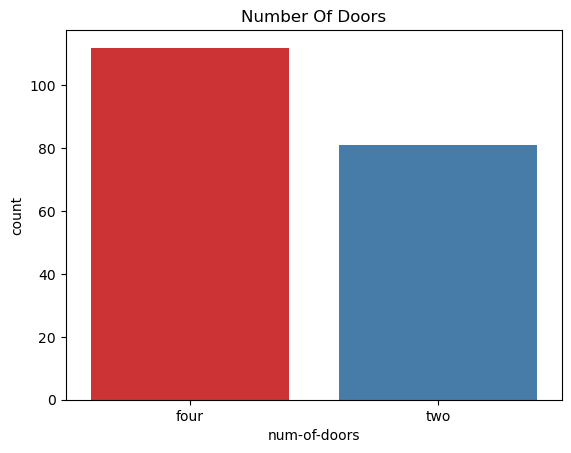

In [24]:
g = sns.countplot(x = 'num-of-doors',data = df,order = ['four','two'],palette = 'Set1')
g.set_title("Number Of Doors")
plt.show()

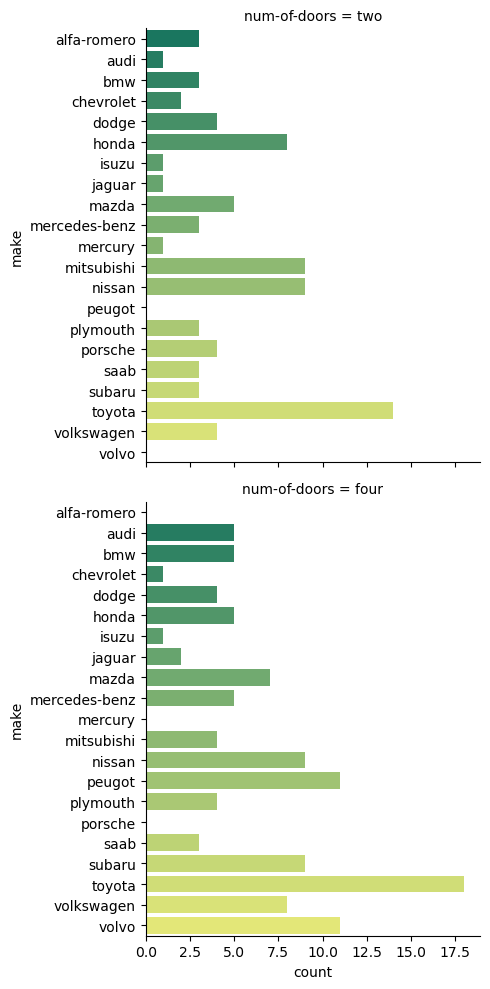

In [25]:
sns.catplot(y = 'make',data = df,kind = 'count',row = 'num-of-doors',palette = 'summer')
plt.show()


> __<font color ='red'>it give alot of insights here such 'volvo' has not cars with two doors in ourdata and 'mercury' has no cars with four doors!<font>__

### Q: As we asked before : we want to know if number of doors has different Losses?

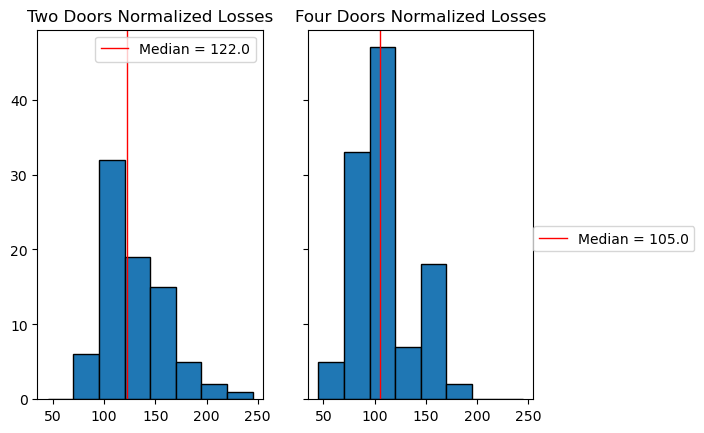

In [26]:
onee = df[df['num-of-doors']=='two']['normalized-losses']
twoo = df[df['num-of-doors']=='four']['normalized-losses']

binss = [int(x) for x in range(int(df['normalized-losses'].min())-20,int(df['normalized-losses'].max()),25)]
fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols=2,sharex = True,sharey = True)

ax1.hist(x = onee,bins = binss, edgecolor = 'black')
ax2.hist(x = twoo,bins = binss, edgecolor = 'black')
ax1.set_title("Two Doors Normalized Losses")
ax2.set_title("Four Doors Normalized Losses")

ax1.axvline(onee.median(), color='red', label=f"Median = {onee.median()}", linewidth=1)
# ax1.axvline(onee.mean(), color='green', label="Mean", linewidth=1)

ax2.axvline(twoo.median(), color='red', label=f"Median = {twoo.median()}", linewidth=1)
# ax2.axvline(twoo.mean(), color='green', label="Mean", linewidth=1)

ax1.legend()
ax2.legend(loc = [1,0.4])
plt.show()

<font color = 'red'>Answer: Yes from two graphs above it said that the average noramlized losses in case of 'Two Doors' is higher than other case.. which conclude that 'four doors' cars keep it's price longer period of time<font>

---
---
### Q: we wish to know if 'four doors' cars has more safety than other or not by symboling factor?

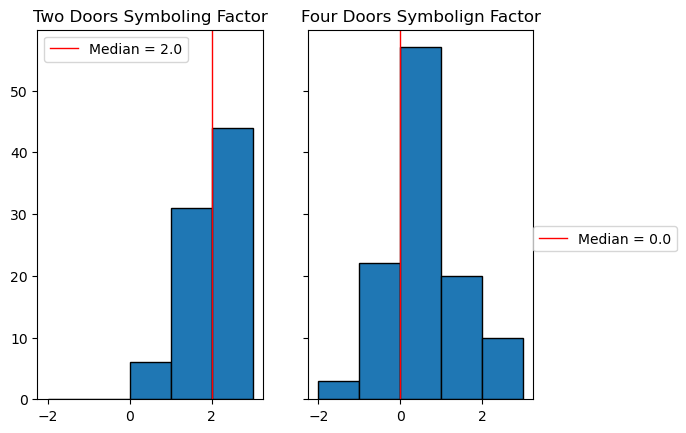

In [27]:
onee = df[df['num-of-doors']=='two']['symboling']
twoo = df[df['num-of-doors']=='four']['symboling']

binss = [int(x) for x in range(int(df['symboling'].min()),int(df['symboling'].max()+1),1)]
fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols=2,sharex = True,sharey = True)

ax1.hist(x = onee,bins = binss, edgecolor = 'black')
ax2.hist(x = twoo,bins = binss, edgecolor = 'black')
ax1.set_title("Two Doors Symboling Factor")
ax2.set_title("Four Doors Symbolign Factor")

ax1.axvline(onee.median(), color='red', label=f"Median = {onee.median()}", linewidth=1)
# ax1.axvline(onee.mean(), color='green', label="Mean", linewidth=1)

ax2.axvline(twoo.median(), color='red', label=f"Median = {twoo.median()}", linewidth=1)
# ax2.axvline(twoo.mean(), color='green', label="Mean", linewidth=1)

ax1.legend()
ax2.legend(loc = [1,0.4])
plt.show()

><font color = 'red'>Answer: IMPORTANT INSIGHT\
    The four doors has more safety average factor<font>
---

In [28]:
printing_info('body-style')

		 Body-style Column :


Unique Values
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Value Count
sedan          92
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body-style, dtype: int64
Info
<class 'pandas.core.series.Series'>
Int64Index: 193 entries, 0 to 204
Series name: body-style
Non-Null Count  Dtype 
--------------  ----- 
193 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB
None
Column Describe
count       193
unique        5
top       sedan
freq         92
Name: body-style, dtype: object


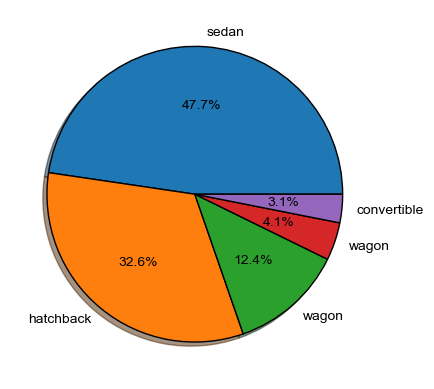

In [29]:
kinnd = [df['body-style'].value_counts()[0],df['body-style'].value_counts()[1],
         df['body-style'].value_counts()[2],df['body-style'].value_counts()[3],df['body-style'].value_counts()[4]]
laabbell = ['sedan' ,'hatchback', 'wagon','wagon','convertible']

plt.pie(kinnd , labels = laabbell , wedgeprops={'edgecolor':'black'},
        shadow=True,
        autopct = '%1.1f%%')
plt.style.use('seaborn')
plt.show()

>__<font color = 'red'>Sedan and Hatchback are the most in our Data<font>__

### Q: which body-style in two doors and which in four doors?

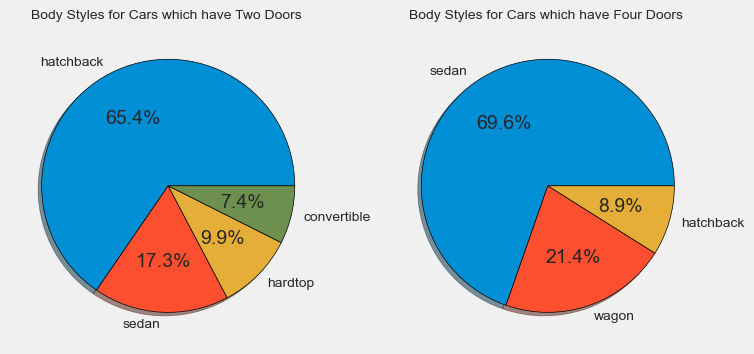

In [30]:
lab1 = df[df['num-of-doors'] == 'two']['body-style'].value_counts().index
kindd1 = df[df['num-of-doors'] == 'two']['body-style'].value_counts()

lab2 = df[df['num-of-doors'] == 'four']['body-style'].value_counts().index
kindd2 = df[df['num-of-doors'] == 'four']['body-style'].value_counts()

plt.style.use('fivethirtyeight')
fig,(ax1,ax2) =plt.subplots(nrows = 1,ncols = 2)

ax1.pie(kindd1 , labels = lab1 , wedgeprops={'edgecolor':'black'},
        shadow=True,
        autopct = '%1.1f%%')
# plt.style.use('seaborn')
ax2.pie(kindd2 , labels = lab2 , wedgeprops={'edgecolor':'black'},
        shadow=True,
        autopct = '%1.1f%%')
ax1.set_title("Body Styles for Cars which have Two Doors ",size = 10)
ax2.set_title("Body Styles for Cars which have Four Doors ",size = 10)

plt.show()

><font color = 'red'>- Most Cars which have only Two Doors are in 'Hatchback' Style\
    - But Most Cars which have four Doors are in 'Sedan' Style<font>

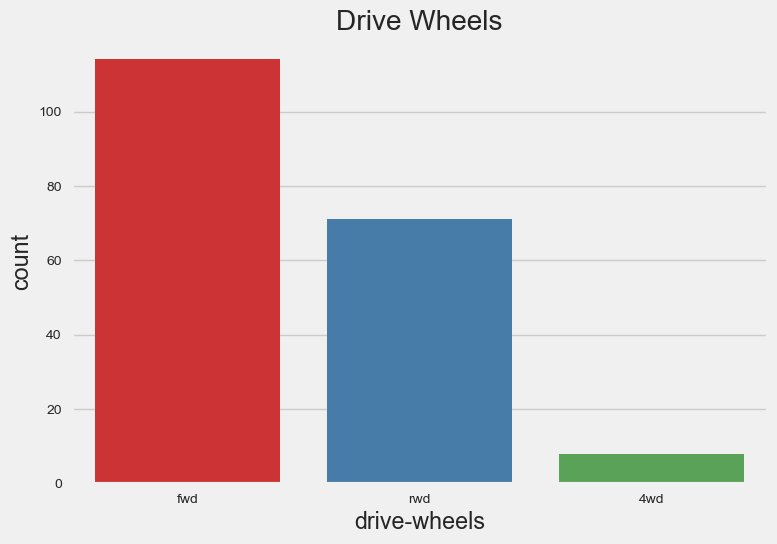

In [31]:
g = sns.countplot(x = 'drive-wheels',data = df,order = df['drive-wheels'].value_counts().index,palette = 'Set1')
g.set_title("Drive Wheels")
plt.show()

---
---
### Q: Which of the three types of drive wheels has more safety than others?

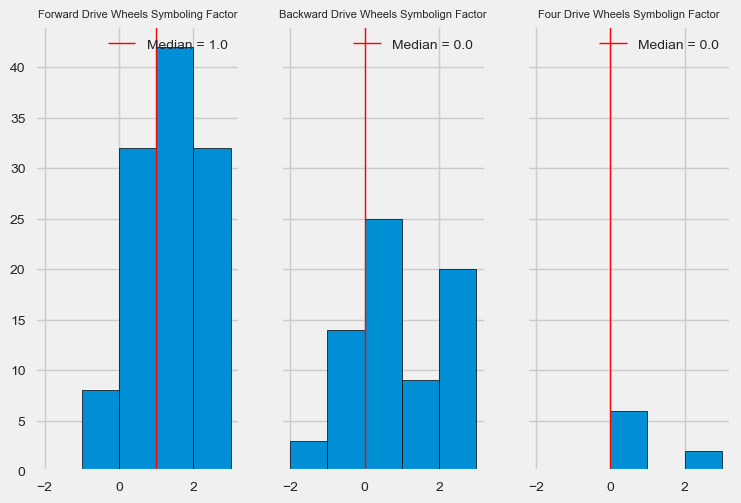

In [32]:
onee = df[df['drive-wheels']=='fwd']['symboling']
twoo = df[df['drive-wheels']=='rwd']['symboling']
three = df[df['drive-wheels']=='4wd']['symboling']


binss = [int(x) for x in range(-2,4,1)]
fig,(ax1,ax2,ax3) = plt.subplots(nrows = 1,ncols=3,sharex = True,sharey = True)

ax1.hist(x = onee,bins = binss, edgecolor = 'black')
ax2.hist(x = twoo,bins = binss, edgecolor = 'black')
ax3.hist(x = three,bins = binss, edgecolor = 'black')


ax1.set_title("Forward Drive Wheels Symboling Factor",size = 8)
ax2.set_title("Backward Drive Wheels Symbolign Factor",size = 8)
ax3.set_title("Four Drive Wheels Symbolign Factor",size =8)


ax1.axvline(onee.median(), color='red', label=f"Median = {onee.median()}", linewidth=1)
ax2.axvline(twoo.median(), color='red', label=f"Median = {twoo.median()}", linewidth=1)
ax3.axvline(three.median(), color='red', label=f"Median = {three.median()}", linewidth=1)


ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

>**<font color = 'red'>Forward Drive wheels has less average safety\
    BackWard Drive wheels has more safety!<font>**

In [33]:
printing_info('engine-location')

		 Engine-location Column :


Unique Values
['front' 'rear']
Value Count
front    190
rear       3
Name: engine-location, dtype: int64
Info
<class 'pandas.core.series.Series'>
Int64Index: 193 entries, 0 to 204
Series name: engine-location
Non-Null Count  Dtype 
--------------  ----- 
193 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB
None
Column Describe
count       193
unique        2
top       front
freq        190
Name: engine-location, dtype: object


In [34]:
df[df['engine-location']=='rear']['make']

126    porsche
127    porsche
128    porsche
Name: make, dtype: object

In [35]:
printing_info('wheel-base')

		 Wheel-base Column :


Unique Values
[ 88.6  94.5  99.8  99.4 105.8 101.2 103.5 110.   88.4  93.7 103.3  95.9
  86.6  96.5  94.3  96.  113.  102.   93.1  98.8 104.9 106.7 115.6  96.6
 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2 107.9 114.2
 108.   89.5  99.1  93.3  97.   96.9  95.7  98.4 102.4 102.9 104.5  97.3
 104.3 109.1]
Value Count
94.5     19
93.7     19
95.7     13
96.5      8
97.3      7
98.4      6
104.3     6
100.4     6
107.9     6
99.1      6
96.3      6
98.8      5
93.1      5
109.1     5
102.4     5
95.9      5
97.2      5
97.0      4
114.2     4
101.2     4
110.0     3
89.5      3
103.5     3
105.8     3
96.9      2
102.9     2
104.5     2
91.3      2
88.6      2
113.0     2
99.8      2
103.3     2
115.6     2
86.6      2
104.9     2
95.1      1
99.4      1
88.4      1
94.3      1
96.0      1
93.3      1
102.0     1
93.0      1
106.7     1
108.0     1
96.6      1
99.2      1
120.9     1
102.7     1
112.0     1
Name: wheel-base, dtype: int64
Info
<class 

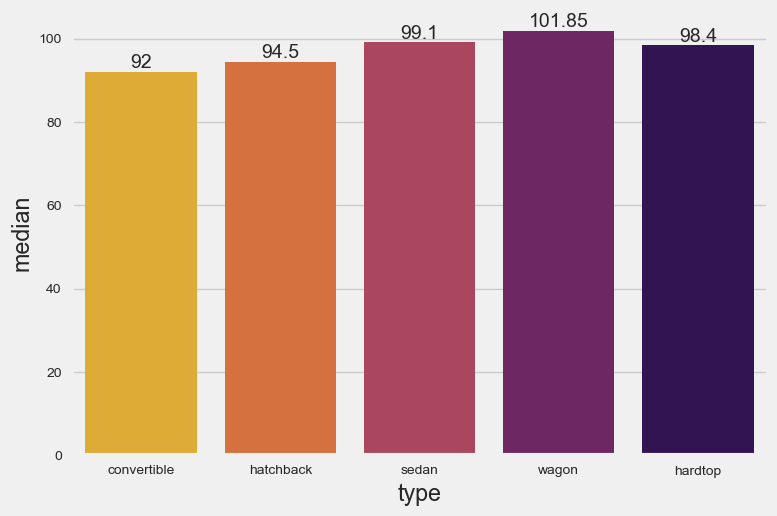

In [36]:
liss = {}
liss['type'] = df['body-style'].unique()
liss['median'] = []
for i in df['body-style'].unique():
    
    liss['median'].append(df[df['body-style']==i]['wheel-base'].median())

thedf = pd.DataFrame(liss)

a = sns.barplot(x='type',y = 'median',data =thedf,palette = 'inferno_r')
for i in a.containers:
    a.bar_label(i,)
plt.show()

>__<font color = 'red'>Wagon and Sedan has higher average wheel base among all style types<font>__

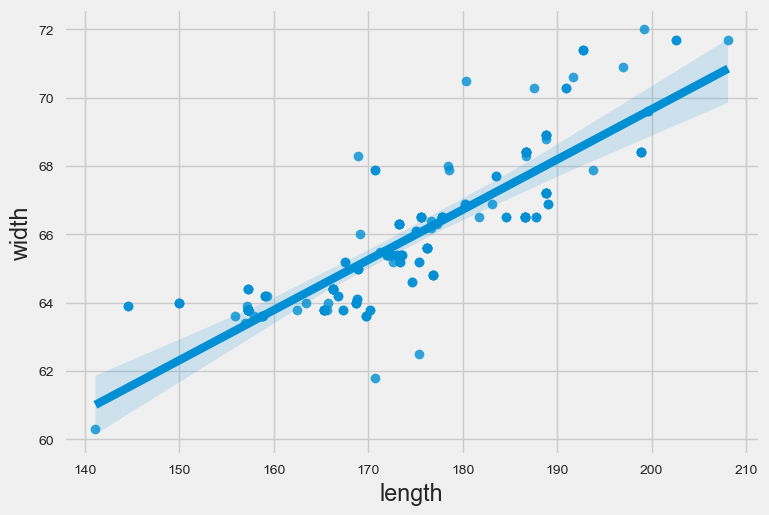

In [37]:
sns.regplot(x = 'length',y = 'width',data =df ,ci = 100)
plt.show()

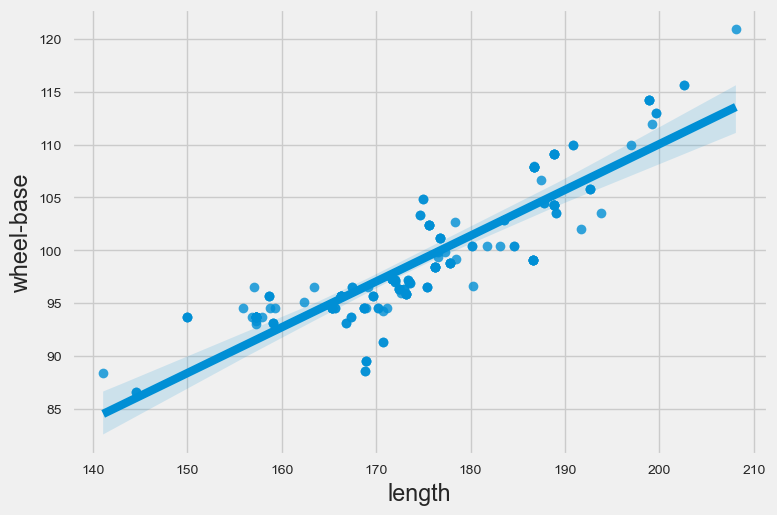

In [38]:
sns.regplot(x = 'length',y = 'wheel-base',data =df ,ci = 100)

plt.show()

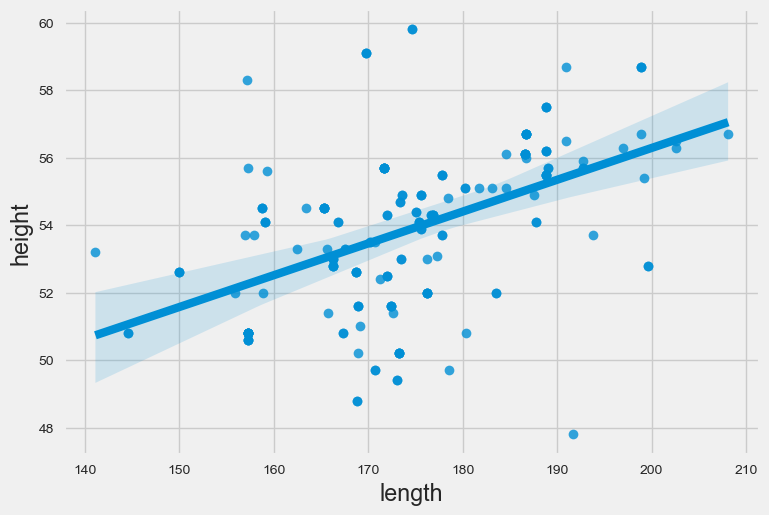

In [39]:
sns.regplot(x = 'length',y = 'height',data =df ,ci = 100)

plt.show()

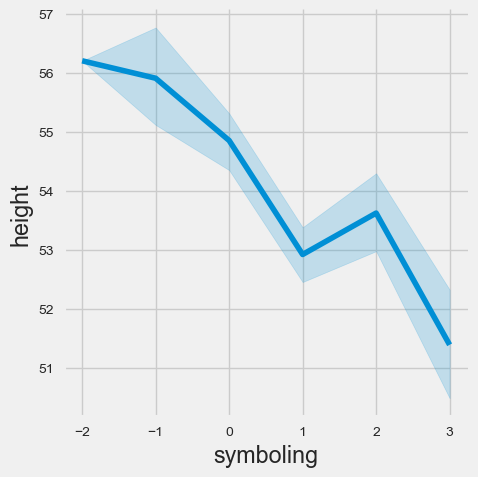

In [40]:
sns.relplot(x = 'symboling',y = 'height',data=df , kind = 'line')
plt.show()

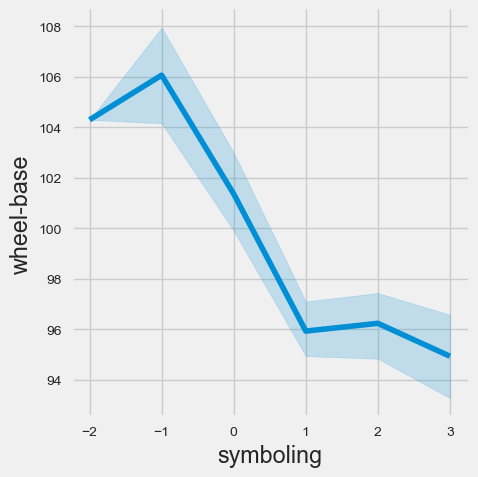

In [41]:
sns.relplot(x = 'symboling',y = 'wheel-base',data=df , kind = 'line')
plt.show()

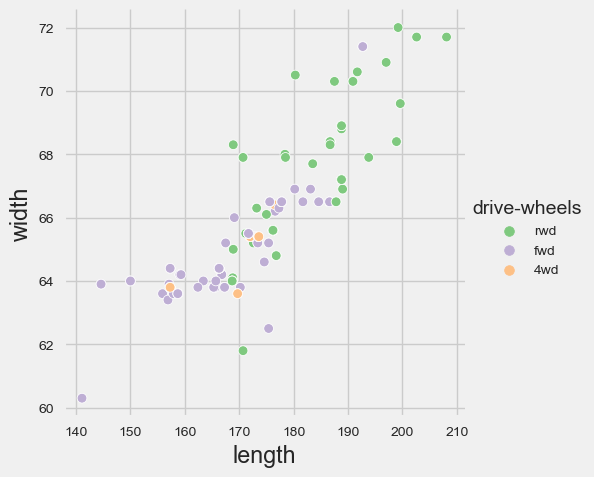

In [42]:
sns.relplot(y = 'width',x = 'length',data=df , kind = 'scatter',hue = 'drive-wheels',palette = 'Accent')
plt.show()

### Q: which type of body style has higher average curb weight?

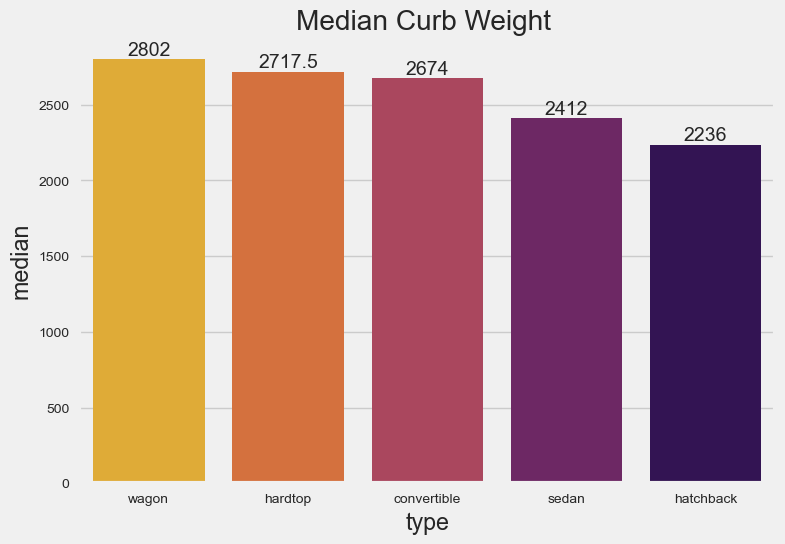

In [43]:
liss = {}
liss['type'] = df['body-style'].unique()
liss['median'] = []
for i in df['body-style'].unique():
    
    liss['median'].append(df[df['body-style']==i]['curb-weight'].median())

thedf = pd.DataFrame(liss)
thedf.sort_values(by ='median' ,ascending=False,inplace=True)
a = sns.barplot(x='type',y = 'median',data =thedf,palette = 'inferno_r')
for i in a.containers:
    a.bar_label(i,)
plt.title("Median Curb Weight ")
plt.show()

In [44]:
printing_info('engine-type')

		 Engine-type Column :


Unique Values
['dohc' 'ohcv' 'ohc' 'l' 'ohcf']
Value Count
ohc     141
ohcf     15
ohcv     13
dohc     12
l        12
Name: engine-type, dtype: int64
Info
<class 'pandas.core.series.Series'>
Int64Index: 193 entries, 0 to 204
Series name: engine-type
Non-Null Count  Dtype 
--------------  ----- 
193 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB
None
Column Describe
count     193
unique      5
top       ohc
freq      141
Name: engine-type, dtype: object


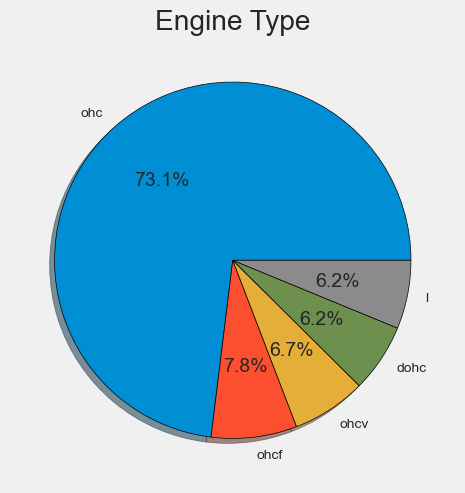

In [45]:
lab1 = df['engine-type'].value_counts().index
kindd1 = df['engine-type'].value_counts()

plt.pie(kindd1 , labels = lab1 , wedgeprops={'edgecolor':'black'},
        shadow=True,
        autopct = '%1.1f%%')
plt.title("Engine Type")
plt.show()

In [46]:
printing_info('num-of-cylinders')

		 Num-of-cylinders Column :


Unique Values
['four' 'six' 'five' 'three' 'twelve' 'eight']
Value Count
four      153
six        24
five       10
eight       4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64
Info
<class 'pandas.core.series.Series'>
Int64Index: 193 entries, 0 to 204
Series name: num-of-cylinders
Non-Null Count  Dtype 
--------------  ----- 
193 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB
None
Column Describe
count      193
unique       6
top       four
freq       153
Name: num-of-cylinders, dtype: object


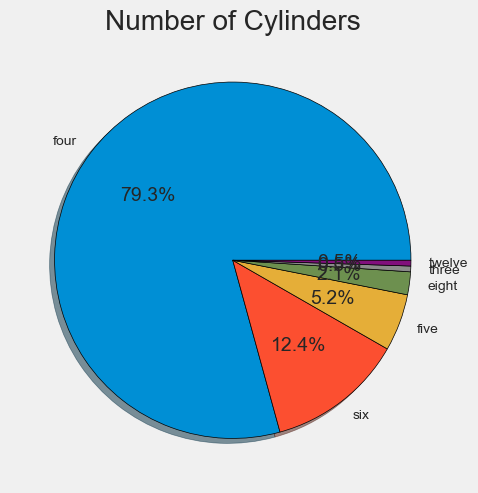

In [47]:
lab1 = df['num-of-cylinders'].value_counts().index
kindd1 = df['num-of-cylinders'].value_counts()

plt.pie(kindd1 , labels = lab1 , wedgeprops={'edgecolor':'black'},
        shadow=True,
        autopct = '%1.1f%%')
plt.title("Number of Cylinders")
plt.show()

In [48]:
df[df['num-of-cylinders']=='twelve']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
49,0,115.0,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000


### Q: Is there relationship between 'Number of Cylinders' And 'Engine Size'?

In [49]:
nu = list(df['num-of-cylinders'].unique())

In [50]:
df['num-of-cylinders'].replace(nu,[4,6,5,3,12,8],inplace =True)

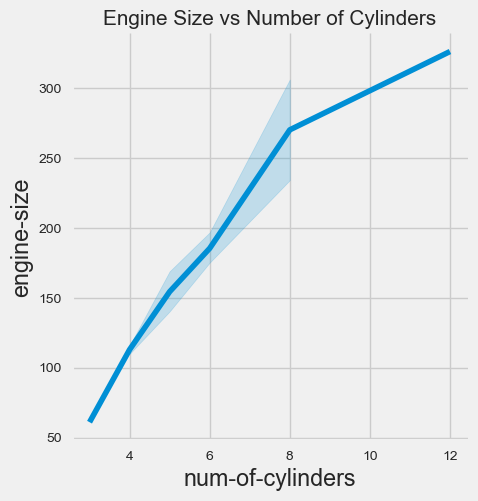

In [51]:
sns.relplot(x='num-of-cylinders',y='engine-size',data =df,kind= 'line')
plt.title("Engine Size vs Number of Cylinders",size = 15)
plt.show()

>__<font color = 'red'>Answer: Yes,There's linear relation between number of cylinders and engine size<font>__

In [52]:
printing_info('fuel-system')

		 Fuel-system Column :


Unique Values
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' 'idi' 'spdi']
Value Count
mpfi    88
2bbl    64
idi     19
1bbl    11
spdi     9
mfi      1
spfi     1
Name: fuel-system, dtype: int64
Info
<class 'pandas.core.series.Series'>
Int64Index: 193 entries, 0 to 204
Series name: fuel-system
Non-Null Count  Dtype 
--------------  ----- 
193 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB
None
Column Describe
count      193
unique       7
top       mpfi
freq        88
Name: fuel-system, dtype: object


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


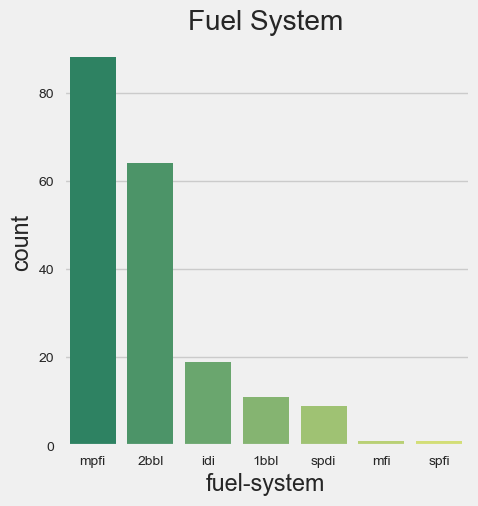

In [53]:
sns.catplot('fuel-system',data =df,order=df['fuel-system'].value_counts().index,kind = 'count',palette = 'summer')
plt.title("Fuel System")
plt.show()

In [54]:
printing_info('bore')

		 Bore Column :


Unique Values
['3.47' '2.68' '3.19' '3.13' '3.5' '3.31' '3.62' '2.91' '3.03' '2.97'
 '3.34' '3.6' '2.92' '3.15' '3.43' '3.63' '3.54' '3.08' '3.39' '3.76'
 '3.58' '3.46' '3.8' '3.78' '3.17' '3.35' '3.59' '2.99' '3.33' '3.7'
 '3.61' '3.94' '3.74' '2.54' '3.05' '3.27' '3.24' '3.01']
Value Count
3.62    23
3.19    20
3.15    15
2.97    12
3.03     9
3.43     8
3.31     8
3.78     8
3.46     7
3.27     7
2.91     7
3.54     6
3.05     6
3.58     6
3.01     5
3.7      5
3.39     5
3.35     4
3.74     3
3.59     3
3.17     3
3.33     2
3.24     2
3.47     2
3.8      2
3.63     2
3.5      2
2.68     1
3.08     1
2.99     1
2.92     1
3.61     1
3.94     1
3.6      1
2.54     1
3.34     1
3.13     1
3.76     1
Name: bore, dtype: int64
Info
<class 'pandas.core.series.Series'>
Int64Index: 193 entries, 0 to 204
Series name: bore
Non-Null Count  Dtype 
--------------  ----- 
193 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB
None
Column Describe
count      193
unique 

### Q: Is cylinder number increasing with bore diameter?

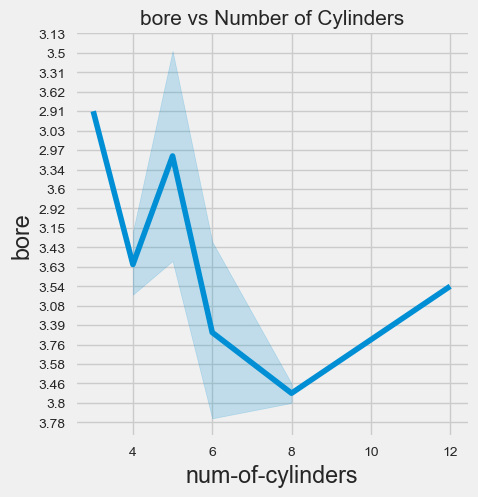

In [55]:
sns.relplot(x='num-of-cylinders',y='bore',data =df,kind= 'line')
plt.title("bore vs Number of Cylinders",size = 15)
plt.show()

### Q: Is stroke increasing with bore diameter?

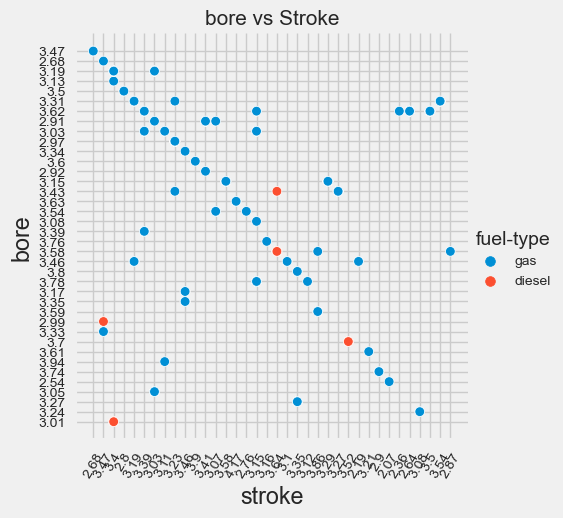

In [56]:
sns.relplot(x='stroke',y='bore',data =df,kind ='scatter',hue = 'fuel-type')
plt.title("bore vs Stroke",size = 15)
plt.xticks(rotation=60)
plt.show()

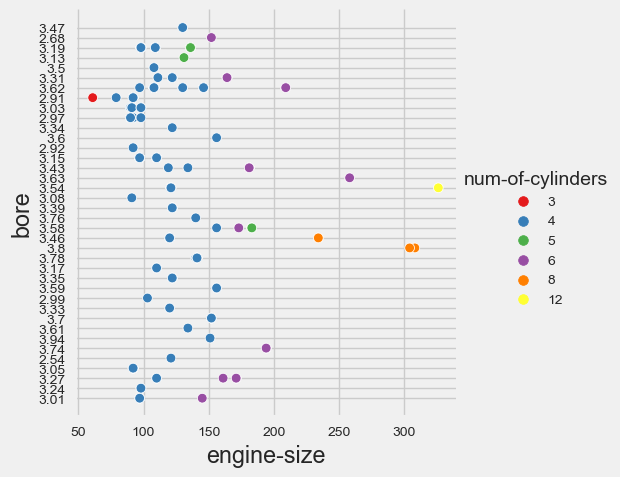

In [57]:
sns.relplot(x = 'engine-size',y = 'bore',data =df ,kind = 'scatter',hue = 'num-of-cylinders',palette = 'Set1')
plt.show()

In [58]:
printing_info('compression-ratio')

		 Compression-ratio Column :


Unique Values
[ 9.   10.    8.    8.5   8.3   8.8   9.5   9.6   9.41  9.4   7.6   7.
  9.2  10.1   9.1   8.1  11.5   8.6  22.   21.5   7.5  21.9   7.8   8.4
 21.    9.31  9.3   8.7   7.7  22.5  23.  ]
Value Count
9.00     46
9.40     22
8.50     14
9.50     13
9.30     11
8.00      8
9.20      8
8.70      7
7.00      6
8.60      5
21.00     5
8.40      5
7.50      5
23.00     5
21.50     4
9.60      3
22.50     3
8.30      3
7.60      3
8.80      3
8.10      2
7.70      2
10.00     2
9.31      1
9.10      1
9.41      1
21.90     1
22.00     1
10.10     1
11.50     1
7.80      1
Name: compression-ratio, dtype: int64
Info
<class 'pandas.core.series.Series'>
Int64Index: 193 entries, 0 to 204
Series name: compression-ratio
Non-Null Count  Dtype  
--------------  -----  
193 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB
None
Column Describe
count    193.000000
mean      10.143627
std        3.977491
min        7.000000
25%        8.500000
50%   

Text(0.5, 1.0, 'Compression Ratio')

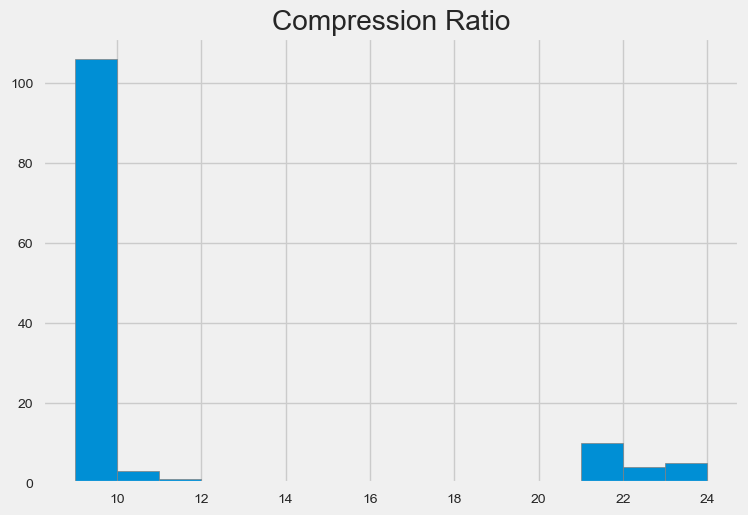

In [59]:
bi = [x for x in range(9,25,1)]
plt.hist(df['compression-ratio'],edgecolor='gray',bins=bi)
plt.title("Compression Ratio")

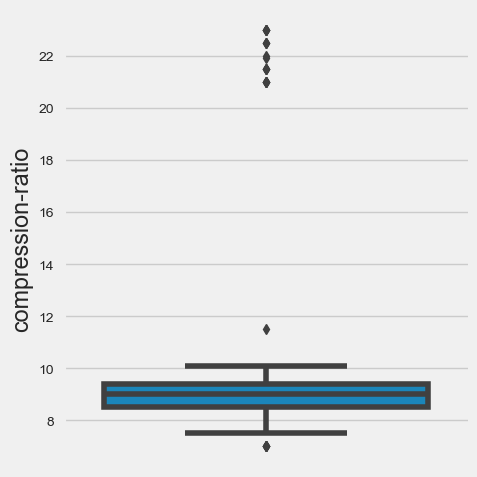

In [60]:
sns.catplot(y='compression-ratio',data= df,kind ='box')
plt.show()

In [61]:
df[df['compression-ratio']>12]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
66,0,115.0,mazda,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72,4200,31,39,18344
67,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,25552
68,-1,93.0,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28248
69,0,93.0,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28176
70,-1,93.0,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600
90,1,128.0,nissan,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099
108,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.7,3.52,21.0,95,4150,28,33,13200
110,0,115.0,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.7,3.52,21.0,95,4150,25,25,13860
112,0,161.0,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.7,3.52,21.0,95,4150,28,33,16900
114,0,115.0,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.7,3.52,21.0,95,4150,25,25,17075


In [62]:
li = list(df['compression-ratio'].unique())
li.sort()

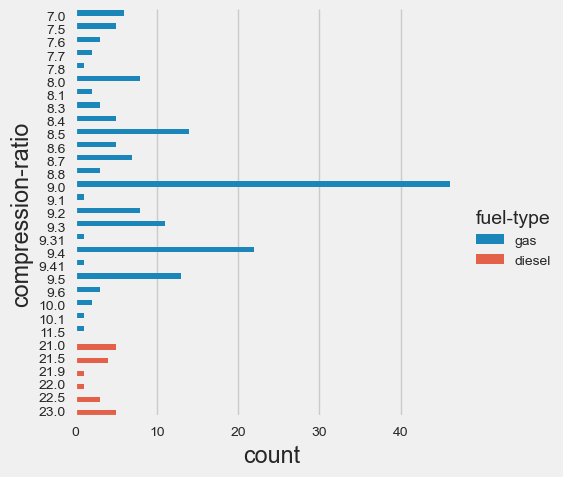

In [63]:
sns.catplot(y='compression-ratio',data=df,hue='fuel-type',order =li,kind ='count')
# plt.xticks(rotation =90)
plt.show()

>__<font color = 'red'>It seems like diessel has much higher compression ratio<font>__

In [64]:
printing_info('horsepower')

		 Horsepower Column :


Unique Values
['111' '154' '102' '115' '110' '140' '101' '121' '182' '48' '70' '68' '88'
 '145' '58' '76' '60' '86' '100' '78' '90' '176' '262' '84' '120' '72'
 '123' '155' '184' '175' '116' '69' '55' '97' '152' '160' '200' '95' '142'
 '143' '207' '73' '82' '94' '62' '56' '112' '92' '161' '156' '52' '85'
 '114' '162' '134' '106']
Value Count
68     19
69     10
116     9
70      9
110     8
95      7
114     6
88      6
62      6
160     5
76      5
97      5
82      5
84      5
145     5
111     4
92      4
123     4
86      4
102     4
90      3
85      3
182     3
73      3
207     3
121     3
101     3
152     3
161     2
112     2
56      2
156     2
52      2
94      2
162     2
184     2
176     2
155     2
100     2
78      1
134     1
115     1
140     1
48      1
58      1
60      1
200     1
55      1
262     1
120     1
72      1
154     1
175     1
143     1
142     1
106     1
Name: horsepower, dtype: int64
Info
<class 'pandas.core.series.Series'>

In [65]:
df['horsepower']= df['horsepower'].astype(int)

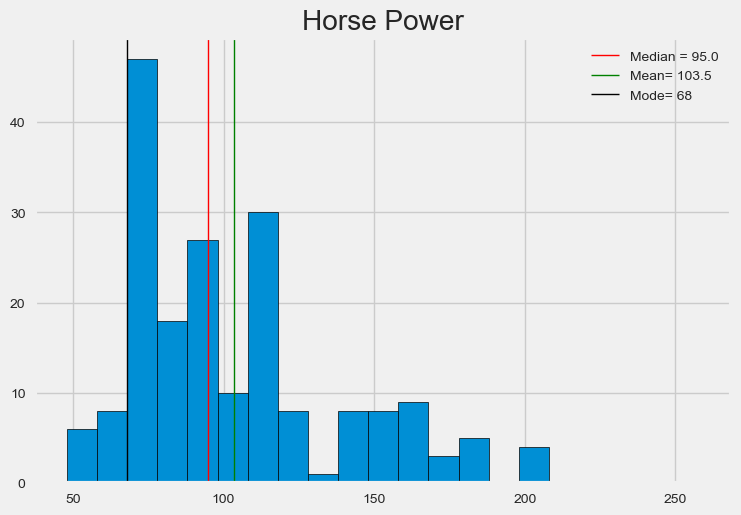

In [66]:
onee = df['horsepower']

binss = [int(x) for x in range(int(df['horsepower'].min()),int(df['horsepower'].max()+1),10)]
fig,(ax1) = plt.subplots(nrows = 1,ncols=1,sharex = True,sharey = True)

ax1.hist(x = onee,bins = binss, edgecolor = 'black')

ax1.set_title("Horse Power")


ax1.axvline(onee.median(), color='red', label=f"Median = {onee.median()}", linewidth=1)
ax1.axvline(onee.mean(), color='green', label=f"Mean= {onee.mean():.4}".format(), linewidth=1)
ax1.axvline(onee.mode()[0], color='black', label=f"Mode= {onee.mode()[0]}", linewidth=1)

ax1.legend()
plt.show()

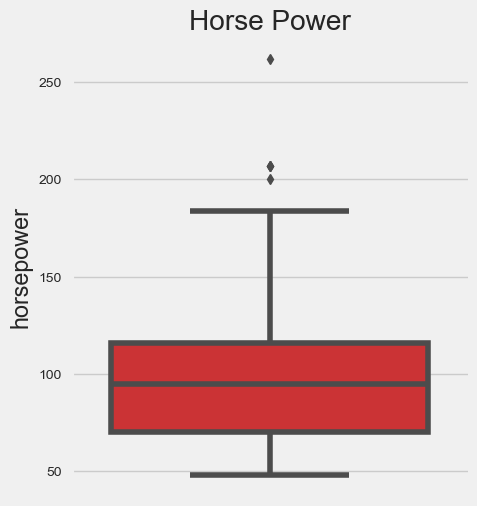

In [67]:
sns.catplot(y='horsepower',data= df,kind ='box',palette = 'Set1')
plt.title("Horse Power")
plt.show()

In [68]:
printing_info('peak-rpm')

		 Peak-rpm Column :


Unique Values
['5000' '5500' '5800' '4250' '5400' '5100' '4800' '6000' '4750' '4200'
 '4350' '4500' '5200' '4150' '5600' '5900' '5250' '4900' '4400' '6600'
 '5300']
Value Count
4800    36
5500    35
5000    27
5200    23
5400    11
4500     7
5800     7
5250     7
4150     5
6000     5
4200     5
4350     4
4750     4
5100     3
5900     3
4250     3
4400     3
6600     2
5600     1
4900     1
5300     1
Name: peak-rpm, dtype: int64
Info
<class 'pandas.core.series.Series'>
Int64Index: 193 entries, 0 to 204
Series name: peak-rpm
Non-Null Count  Dtype 
--------------  ----- 
193 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB
None
Column Describe
count      193
unique      21
top       4800
freq        36
Name: peak-rpm, dtype: object


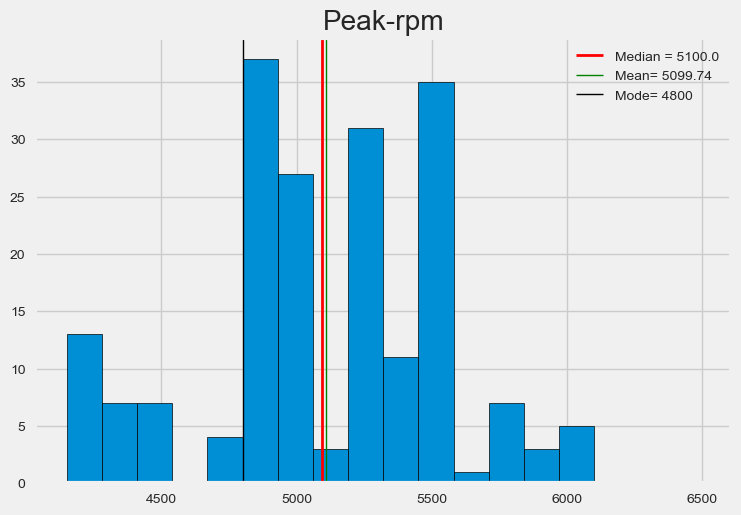

In [69]:
df['peak-rpm']=df['peak-rpm'].astype(int)
onee = df['peak-rpm']

binss = [int(x) for x in range(int(df['peak-rpm'].min()),int(df['peak-rpm'].max()+1),130)]
fig,(ax1) = plt.subplots(nrows = 1,ncols=1,sharex = True,sharey = True)

ax1.hist(x = onee,bins = binss, edgecolor = 'black')

ax1.set_title("Peak-rpm")


ax1.axvline(onee.median()-5, color='red', label=f"Median = {onee.median()}", linewidth=2)
ax1.axvline(onee.mean()+10, color='green', label=f"Mean= {onee.mean():.6}".format(), linewidth=1)
ax1.axvline(onee.mode()[0], color='black', label=f"Mode= {onee.mode()[0]}", linewidth=1)

ax1.legend()
plt.show()

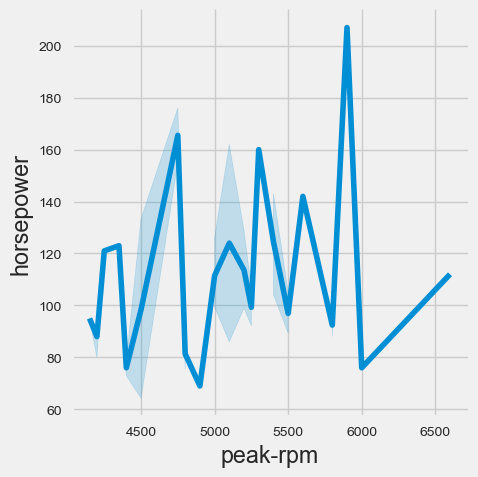

In [70]:
sns.relplot(y='horsepower',x='peak-rpm',data=df,kind='line',ci=90)
plt.show()

In [71]:
printing_info('city-mpg')

		 City-mpg Column :


Unique Values
[21 19 24 18 17 23 20 16 15 47 38 37 31 49 30 27 25 13 26 22 14 45 28 32
 35 34 29 33]
Value Count
31    28
19    27
24    21
27    14
26    12
23    10
17     9
21     8
25     8
30     8
28     7
37     6
38     5
16     4
22     4
15     3
20     3
18     3
29     3
14     2
13     1
49     1
45     1
47     1
32     1
35     1
34     1
33     1
Name: city-mpg, dtype: int64
Info
<class 'pandas.core.series.Series'>
Int64Index: 193 entries, 0 to 204
Series name: city-mpg
Non-Null Count  Dtype
--------------  -----
193 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB
None
Column Describe
count    193.000000
mean      25.326425
std        6.387828
min       13.000000
25%       19.000000
50%       25.000000
75%       30.000000
max       49.000000
Name: city-mpg, dtype: float64


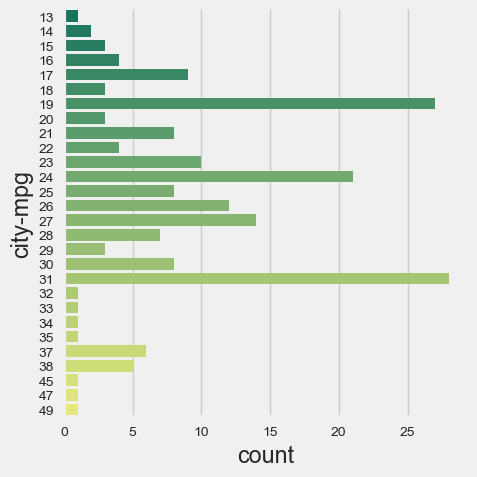

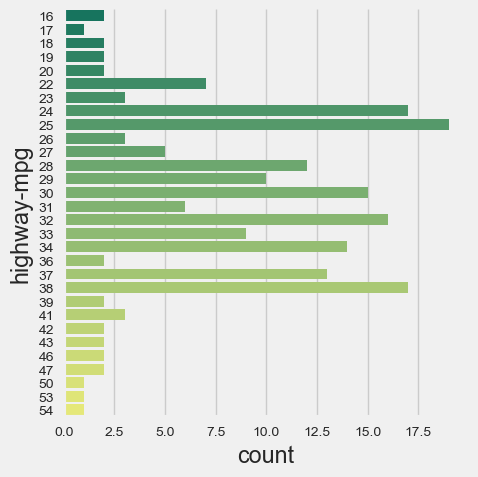

In [72]:
sns.catplot(y='city-mpg',data=df,kind = 'count',palette='summer')
sns.catplot(y='highway-mpg',data=df,kind = 'count',palette='summer')

plt.show()

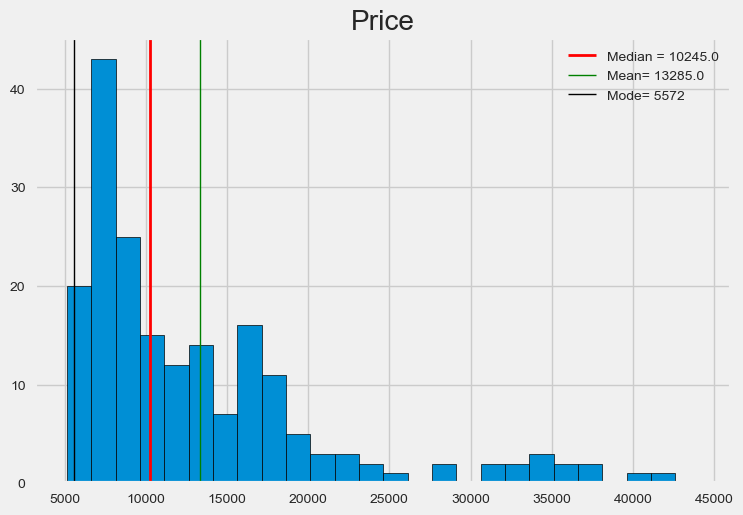

In [73]:
df['price']=df['price'].astype(int)
onee = df['price']

binss = [int(x) for x in range(int(df['price'].min()),int(df['price'].max()+1),1500)]
fig,(ax1) = plt.subplots(nrows = 1,ncols=1,sharex = True,sharey = True)

ax1.hist(x = onee,bins = binss, edgecolor = 'black')

ax1.set_title("Price")


ax1.axvline(onee.median()-5, color='red', label=f"Median = {onee.median()}", linewidth=2)
ax1.axvline(onee.mean()+10, color='green', label=f"Mean= {onee.mean():.6}".format(), linewidth=1)
ax1.axvline(onee.mode()[0], color='black', label=f"Mode= {onee.mode()[0]}", linewidth=1)

ax1.legend()
plt.show()

In [74]:
df[df['price']==df['price'].max()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
74,1,115.0,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.8,3.35,8.0,184,4500,14,16,45400


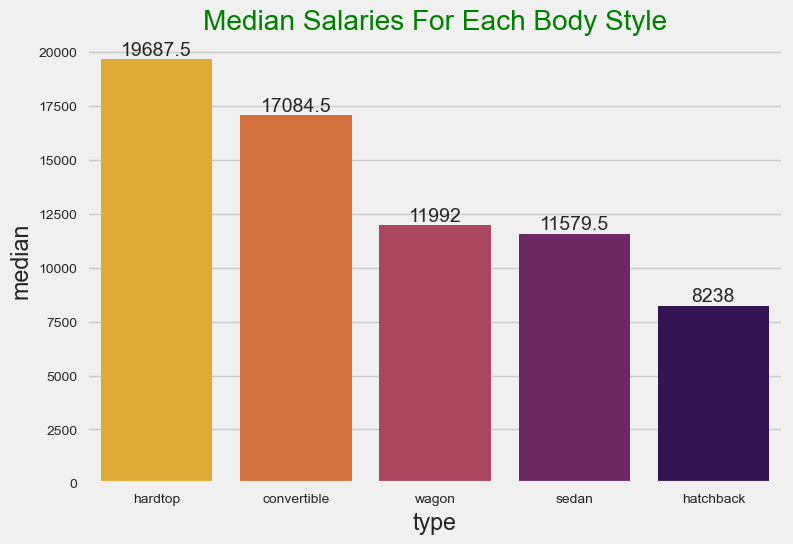

In [75]:
liss = {}
liss['type'] = df['body-style'].unique()
liss['median'] = []
for i in df['body-style'].unique():
    
    liss['median'].append(df[df['body-style']==i]['price'].median())

thedf = pd.DataFrame(liss)
thedf.sort_values(by ='median' ,ascending=False,inplace=True)
a = sns.barplot(x='type',y = 'median',data =thedf,palette = 'inferno_r')
for i in a.containers:
    a.bar_label(i,)
plt.title("Median Salaries For Each Body Style",color='green')
plt.show()

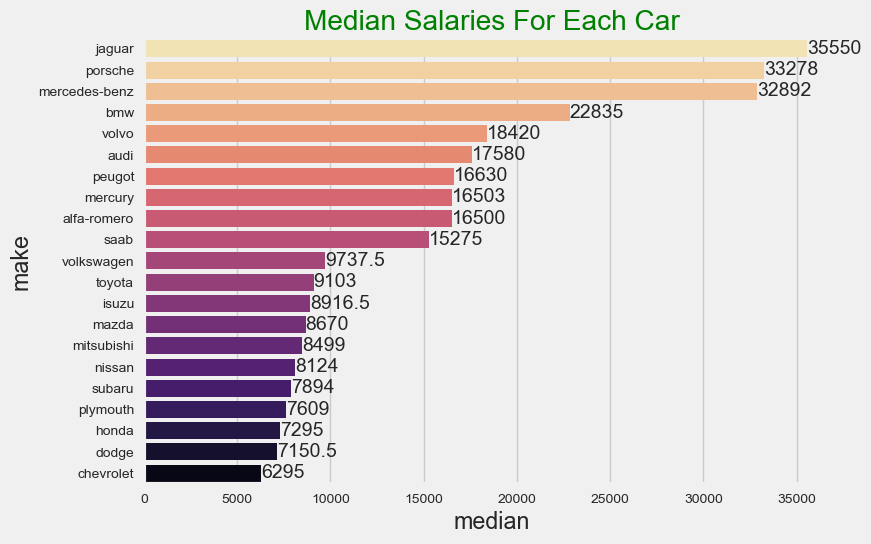

In [76]:
liss = {}
liss['make'] = df['make'].unique()
liss['median'] = []
for i in df['make'].unique():
    
    liss['median'].append(df[df['make']==i]['price'].median())

thedf = pd.DataFrame(liss)
thedf.sort_values(by ='median' ,ascending=False,inplace=True)
a = sns.barplot(y='make',x = 'median',data =thedf,palette = 'magma_r')
for i in a.containers:
    a.bar_label(i,)
plt.title("Median Salaries For Each Car",color='green')
plt.show()

>__<font color= 'red'>Higher Salaries is on side ["Jaguar","Porsche","Marcedes"] and lower on side ["Chevrolet","Dodge","Honda"]<font>__